In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import subprocess

import common

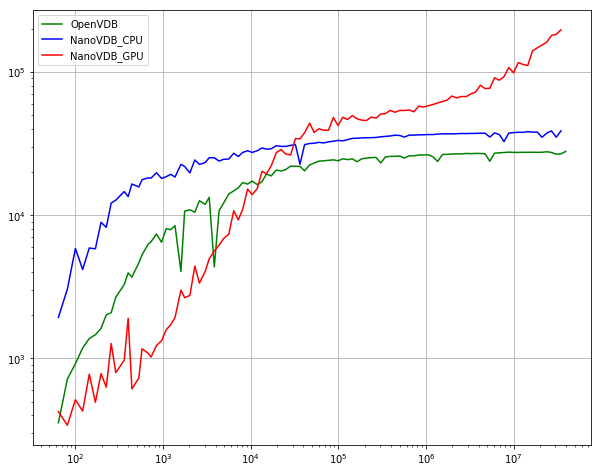

In [8]:
df = common.load_df("../data/2022-04-05_22-01-15_Xeon_6248_Tesla_T4.csv")
plt.rcParams["figure.figsize"] = (10, 8)

# get a list of all kernels   
kernels=["OpenVDB", "NanoVDB_CPU", "NanoVDB_GPU"]
colors=["green", "blue", "red"]

for i in range(len(kernels)):
    kernel_data = df.xs(kernels[i], level=1,  drop_level=False).reset_index()
    plt.plot(kernel_data["n_rays"], kernel_data["Rps/Eur"], color=colors[i])


plt.legend(kernels)
plt.yscale("log")
plt.xscale("log")
plt.grid()

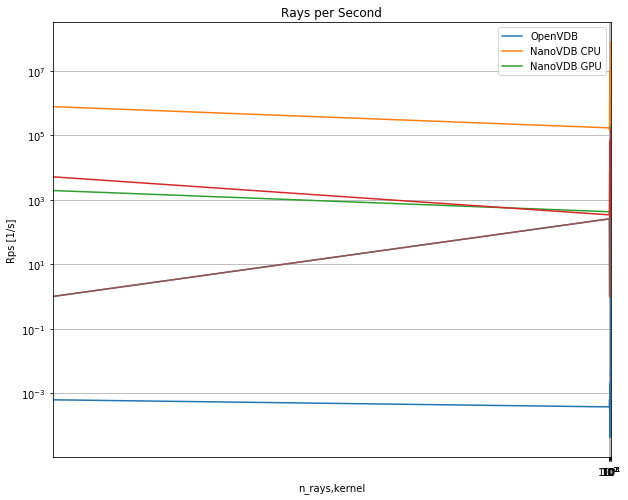

In [9]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["rps_ovdb", "rps_nvdb_cpu", "rps_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot()
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Rps [1/s]")
plt.title("Rays per Second")
plt.show()

Text(0.5, 1.0, 'Relative Speed-Up for 1923096 rays (OpenVDB=1)')

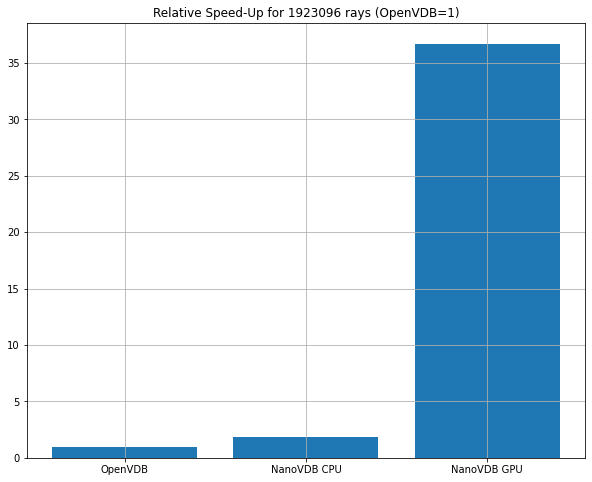

In [5]:
series = df_rps.iloc[-1]
series = series * 1/ series.nsmallest(1)[0]
n_rays = df_rps.index[-1]

plt.bar(cols_names, series.values)
plt.grid()
plt.title(f"Relative Speed-Up for {n_rays} rays (OpenVDB=1)")